# Classification Template

## Installing Pycaret

In [6]:
# !pip install pycaret --user
# !pip install pycaret-nightly --user

## Import Libraries

In [7]:
import pandas as pd
from pycaret.classification import *

## Import Dataset

In [8]:
# path to your dataset, can be a csv file or xlsx
dataset_path = "../Bank_Personal_Loan_Modelling_transformed.xlsx"

## use code as per the type of data source

## use below line to read data from csv file
## df = pd.read_csv(dataset_path)
df = pd.read_excel(dataset_path, index_col=0)

In [9]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,,,,,,,,,,,,,
1,-1.0,-0.95,-0.254237,-0.863923,1.0,0.055556,-0.5,0.0,1,0,-1,0,0
2,0.0,-0.05,-0.508475,-1.241379,0.5,0.000000,-0.5,0.0,1,0,-1,0,0
3,-0.3,-0.25,-0.898305,0.475714,-0.5,-0.277778,-0.5,0.0,0,0,-1,0,0
4,-0.5,-0.55,0.610169,0.250278,-0.5,0.666667,0.0,0.0,0,0,-1,0,0
5,-0.5,-0.60,-0.322034,-0.781238,1.0,-0.277778,0.0,0.0,0,0,-1,1,0


In [27]:
target = 'Personal Loan'

## Data Setup
* See [here](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb) for notebook example(basic level)
* See [here](https://pycaret.org/classification/) for classification documentation.

In [ ]:
# to-do: separate cat and numbers

In [10]:
data=setup(df,target=target, categorical_features=['Family', 'Education'], 
           train_size = 0.8, fold=5)

,Description,Value
0,session_id,272
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5000, 13)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparing models and selecting top 3

In [11]:
#Selecting top3 models for tuning
top3_models=compare_models(n_select=3, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9872,0.9965,0.9048,0.9632,0.9324,0.9254,0.9264,0.3320
gbc,Gradient Boosting Classifier,0.9868,0.9979,0.9049,0.9582,0.9301,0.9228,0.9237,0.2220
rf,Random Forest Classifier,0.9860,0.9973,0.8792,0.9760,0.9239,0.9162,0.9184,0.4280
lightgbm,Light Gradient Boosting Machine,0.9848,0.9968,0.8739,0.9673,0.9170,0.9087,0.9108,0.1340
et,Extra Trees Classifier,0.9840,0.9934,0.8458,0.9881,0.9107,0.9020,0.9057,0.4260
dt,Decision Tree Classifier,0.9817,0.9463,0.9022,0.9094,0.9054,0.8953,0.8956,0.0140
ada,Ada Boost Classifier,0.9705,0.9820,0.7712,0.9137,0.8356,0.8196,0.8236,0.1120
lr,Logistic Regression,0.9575,0.9630,0.6683,0.8647,0.7536,0.7308,0.7382,1.1180
knn,K Neighbors Classifier,0.9542,0.9290,0.5372,0.9852,0.6946,0.6722,0.7088,0.2060
svm,SVM - Linear Kernel,0.9482,0.0000,0.7172,0.7693,0.7317,0.7035,0.7100,0.2660


In [12]:
print(top3_models)

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=272, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, mi

In [2]:
# to-do
# separate notebooks, have basic ones in first
# then tune it using hyperparamaters
# then use ensembling, stacking and blending

# same for regression, classification

## Tuning Models
* Compare model just evaluates using the default hyperparameters, tune model will use cross validation to tune the models, here we will tune top 3 models selected in compare models.

#### NOTE: hyperparameter tuning is performed in a separate notebook,

In [13]:
tune_model(top3_models[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9875,0.9907,0.9481,0.9241,0.9359,0.9290,0.9291
1,0.9875,0.9942,0.9103,0.9595,0.9342,0.9273,0.9277
2,0.9788,0.9971,0.9744,0.8352,0.8994,0.8876,0.8909
3,0.9850,0.9976,0.9615,0.8929,0.9259,0.9176,0.9184
4,0.9788,0.9917,0.9103,0.8765,0.8931,0.8813,0.8815
Mean,0.9835,0.9943,0.9409,0.8976,0.9177,0.9086,0.9095
SD,0.0040,0.0028,0.0264,0.0422,0.0180,0.0202,0.0196


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=272, reg_alpha=0.4,
              reg_lambda=0.05, scale_pos_weight=31.900000000000006,
              subsample=0.9, tree_method='auto', use_label_encoder=True,
              validate_parameters=1, verbosity=0)

In [9]:
# tune_model(top3_models[1])

In [10]:
# tune_model(top3_models[2])

In [11]:
#Tuning the top 3 models
#tuned_model_top3=[tune_model(i) for i in top3_models]

In [12]:
#print(tuned_model_top3)

## Ensembling
* Create ensemble using the top 3 tuned model

NOTE: Notice the output of a cell is for last model executed. Not all three.

In [13]:
## Ensembling top 3 tuned models
# bagged_tuned_top3=[ensemble_model(i,method='Bagging') for i in tuned_model_top3]

In [14]:
# print(bagged_tuned_top3)

## Blending Models

In [15]:
## Blend top3 models
# blender=blend_models(estimator_list=top3_models)

## Stacking models

In [16]:
# stacker=stack_models(top3_models)

## Plot Model results

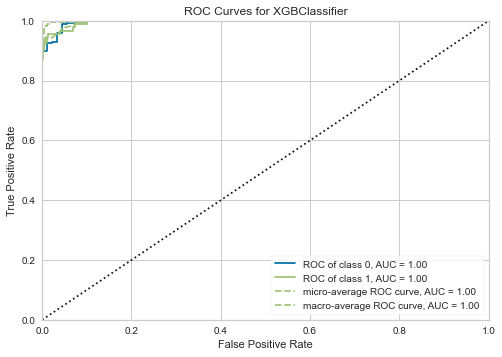

In [14]:
plot_model(top3_models[0])

In [24]:
# plot_model(top3_models[1])

In [25]:
# plot_model(top3_models[2])

## Evaluate Models

In [15]:
evaluate_model(top3_models[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
# evaluate_model(top3_models[1])

In [23]:
# evaluate_model(top3_models[2])

# 2. Explainability Techniques

* Read more on using pycaret models separately with SHAP
* Or better how to work with SHAP in pycaret

In [16]:
# !pip install shap

In [17]:
final_model = top3_models[0]
final_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=272, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [29]:
import shap
explainer = shap.Explainer(final_model)

In [28]:
# data is the information grid returned by the setup method, type is tuple
# seems like second index contains the transformed dataframe
transformed_df = data[5]
transformed_df[target] = data[2]
transformed_df.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Family_-0.5,Family_0.0,Family_0.5,Family_1.0,Education_-0.5,Education_0.0,Education_0.5,Securities Account_0,CD Account_1,Online_0,CreditCard_1,Personal Loan
ID,,,,,,,,,,,,,,,,,,
3750,-0.10,-0.05,0.101695,-1.239155,0.462963,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4698,0.20,0.10,0.661017,-0.781238,0.277778,1.653465,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1738,-0.05,-0.05,0.101695,-0.384872,-0.722222,2.277228,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
319,-0.90,-0.90,0.779661,0.827957,0.166667,1.881188,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
1309,0.45,0.20,-0.237288,-0.519095,0.277778,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0


In [31]:
# #Error in this cell
# shap_values = explainer(transformed_df, check_additivity=False)

In [44]:
# shap.plots.waterfall(shap_values[0])

In [45]:
# shap.initjs()
## Visualize first prediction
# shap.plots.force(shap_values[2])

In [46]:
# display(shap.plots.force(explainer.expected_value[0], shap_values[0]))

### SHAP on sample dataset

In [47]:
# !pip install xgboost

In [48]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [49]:
shap_values

.values =
array([[-4.28501666e-01, -6.66367188e-02,  7.78602287e-02, ...,
         2.56694555e-01, -5.39071299e-02,  5.78832483e+00],
       [-1.59477890e-01, -3.92092764e-02, -9.65500847e-02, ...,
         4.60188717e-01,  1.29054254e-03,  1.54787719e+00],
       [-6.22594878e-02, -3.92413028e-02, -1.63524270e-01, ...,
         3.61137800e-02,  2.09844872e-01,  7.91517401e+00],
       ...,
       [-3.46925646e-01, -1.13532774e-03, -9.87499580e-02, ...,
        -2.10595775e+00, -8.69371593e-02,  2.02094817e+00],
       [ 3.54982555e-01, -1.44685265e-02, -8.39682892e-02, ...,
        -1.67015433e+00,  9.48226675e-02,  2.35491967e+00],
       [-9.26840603e-01, -2.58212350e-03, -2.59856015e-01, ...,
        -1.92664945e+00, -3.10639203e-01,  6.63177595e-02]], dtype=float32)

.base_values =
array([22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.53

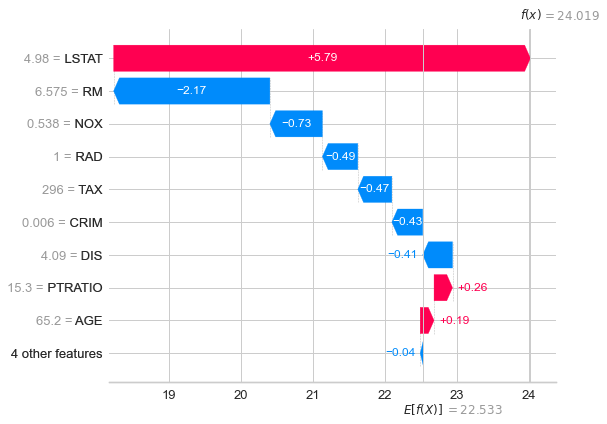

In [50]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

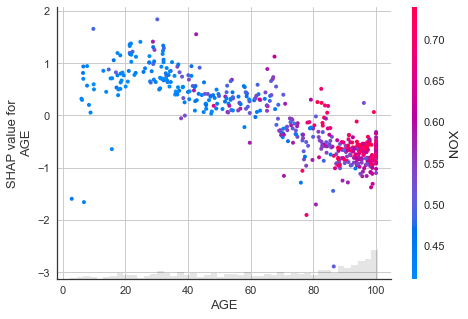

In [51]:
#Visualize all predictions
shap.plots.scatter(shap_values[:,"AGE"],shap_values)

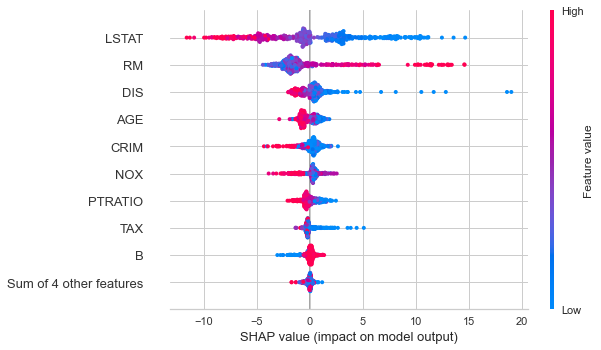

In [52]:
shap.plots.beeswarm(shap_values)

### Interpretation using Pycaret SHAP implementation
* Note that is only supports tree based model, read more [here](https://pycaret.org/classification/).

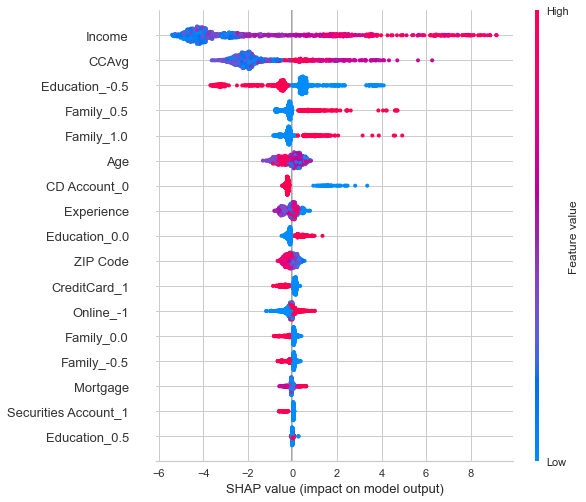

In [53]:
top3_models
#[interpret_model(i) for i in best_model]
interpret_model(top3_models[1],)

### Not optimizing in this step

In [55]:
# , use_holdout = False
# final_model=automl(optimize = 'Accuracy')

In [34]:
print(top3_models)

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=272, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, mi

## Saving final model

In [57]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [44]:
type(top3_models[0])

xgboost.sklearn.XGBClassifier

In [42]:
for model in top3_models:
    model_name = model.__class__.__name__
    save_model(model,'./saved_models/{0}'.format(model_name))
    print('{0} model saved!'.format(model_name))

Transformation Pipeline and Model Succesfully Saved
XGBClassifier model saved!
Transformation Pipeline and Model Succesfully Saved
GradientBoostingClassifier model saved!
Transformation Pipeline and Model Succesfully Saved
RandomForestClassifier model saved!


In [32]:
transformed_df.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Family_-0.5,Family_0.0,Family_0.5,Family_1.0,Education_-0.5,Education_0.0,Education_0.5,Securities Account_0,CD Account_1,Online_0,CreditCard_1,Personal Loan
ID,,,,,,,,,,,,,,,,,,
3750,-0.10,-0.05,0.101695,-1.239155,0.462963,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4698,0.20,0.10,0.661017,-0.781238,0.277778,1.653465,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1738,-0.05,-0.05,0.101695,-0.384872,-0.722222,2.277228,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
319,-0.90,-0.90,0.779661,0.827957,0.166667,1.881188,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
1309,0.45,0.20,-0.237288,-0.519095,0.277778,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0


In [33]:
transformed_df.to_excel('../Bank_Personal_Loan_Modelling_transformed.xlsx')